In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance 
from sklearn import datasets, linear_model, model_selection, preprocessing, svm


(540, 2500) (540,)


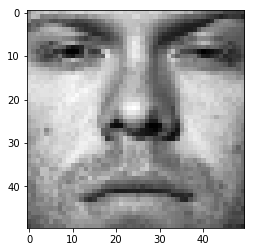

In [9]:
# 1b train

import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


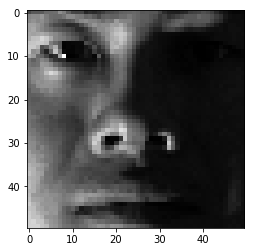

In [3]:
#1b test

%matplotlib inline

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(2500,)


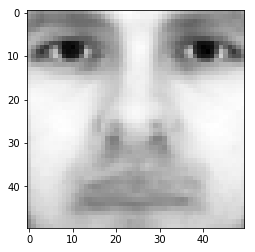

In [21]:
#1c

from functools import reduce
%matplotlib inline

length = len(train_data)
init = [0] * length

average_face = reduce(lambda x, y: x + y, train_data) / length

print(average_face.shape)
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

(540, 2500)


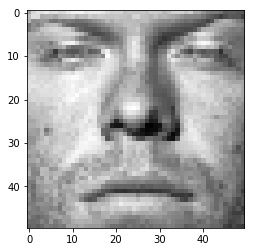

In [104]:
#1d

%matplotlib inline

mean_subtracted_faces = np.array(list(map(lambda x: x - average_face, train_data)))

print(mean_subtracted_faces.shape)
plt.imshow(mean_subtracted_faces[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500)


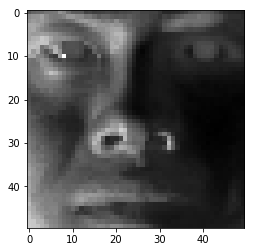

In [103]:
#1d

test_mean_subtracted_faces = np.array(list(map(lambda x: x - average_face, test_data)))

print(mean_subtracted_faces.shape)
plt.imshow(mean_subtracted_faces[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

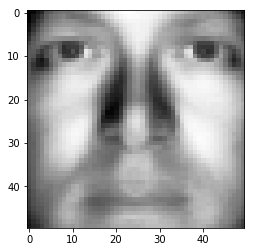

0


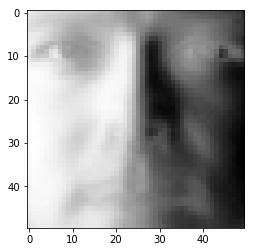

1


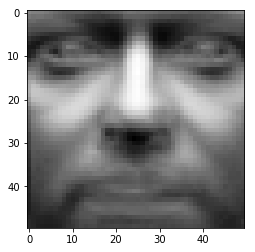

2


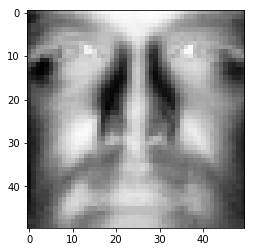

3


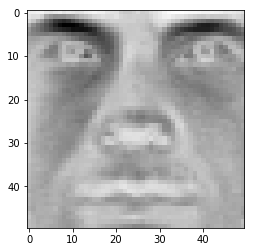

4


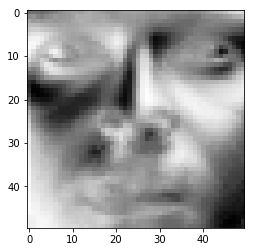

5


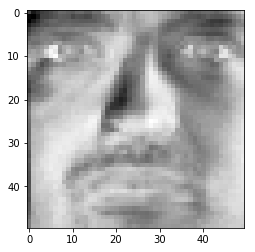

6


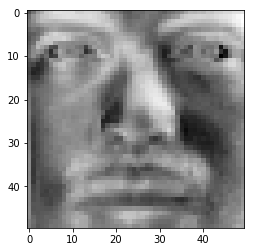

7


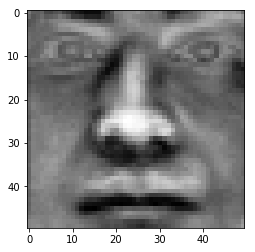

8


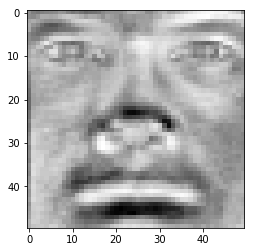

9


In [106]:
#1e

from numpy.linalg import svd

u, sig, vt = svd(mean_subtracted_faces)

for i in range(0, 10):
    plt.imshow(vt[i, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()
    print(i)


In [110]:
#1f
from numpy import dot, diag
from scipy.spatial.distance import euclidean

errors = []
for i in range(0, 200):
    firstDot = dot(u[:,:i],sig[i])
    xr = dot(firstDot,vt[:i,:])
    error = euclidean(mean_subtracted_faces[i], xr[i])
    errors.append(error)

print(np.array(errors).shape)

(200,)


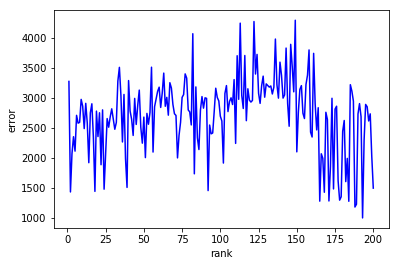

In [114]:
plt.plot(range(1, 201), errors, 'b-')
plt.xlabel('rank')
plt.ylabel('error')
plt.show()

In [121]:
#1g

from numpy import transpose
def getFeatTrain(rank):
    u_train, sig_train, vt_train = svd(mean_subtracted_faces)
    return dot(mean_subtracted_faces, transpose(vt_train[:rank,:]))


In [128]:
def getFeatTest(rank):
    u_test, sig_test, vt_test = svd(test_mean_subtracted_faces)
    return dot(test_mean_subtracted_faces, transpose(vt_test[:rank,:]))


In [147]:
#1h

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
logr = clf.fit(getFeatTrain(10), train_labels)

output = logr.predict(getFeatTest(10))
print(output)


[ 8  6  6  1  6  6  2  1  6  6  3  1  3  2  2  1  2  9  9  6  2  9  2  2  8
  7  2  2  3  1  7  6  8  8  7  7  6  7  6  6  9  5  9  6  9  7  5  5  9  3
  8  9  1  1  5  5  5  2  6  2  8  7  1  7  7  7  9  7  7  9  7  8  7  8  8
  3  9 10  4  3  3 10  7  9  9 10  9 10  8  9  8  8  8  8  4  4  8  4  4  8]


In [150]:
# count = 0
# totalCells = len(output)
# for i in range(totalCells):
#     if np.asarray(test_labels)[i] == output[i]:
#         count += 1
# accuracy = count / totalCells
# print(accuracy)

import collections
totalCells = len(output)
count = collections.Counter(np.asarray(test_labels) - output)[0]
accuracy = count / totalCells
print(accuracy)

0.23


In [153]:
accuracies = []
for i in range(1, 201):
    clf = LogisticRegression()
    logr = clf.fit(getFeatTrain(i), train_labels)
    output = logr.predict(getFeatTest(i))
    count = collections.Counter(np.asarray(test_labels) - output)[0]
    accuracy = count / totalCells
    accuracies.append(accuracy)

print(np.array(accuracies).shape)


(200,)


In [154]:
print(accuracies)

[0.08, 0.06, 0.06, 0.07, 0.12, 0.1, 0.18, 0.17, 0.18, 0.23, 0.19, 0.21, 0.17, 0.13, 0.18, 0.17, 0.19, 0.17, 0.2, 0.18, 0.17, 0.16, 0.14, 0.16, 0.1, 0.11, 0.1, 0.14, 0.13, 0.14, 0.16, 0.15, 0.14, 0.14, 0.14, 0.13, 0.15, 0.13, 0.15, 0.15, 0.18, 0.19, 0.18, 0.19, 0.19, 0.17, 0.15, 0.1, 0.1, 0.1, 0.1, 0.09, 0.11, 0.11, 0.1, 0.11, 0.11, 0.11, 0.11, 0.15, 0.14, 0.15, 0.16, 0.16, 0.16, 0.16, 0.16, 0.18, 0.16, 0.17, 0.17, 0.16, 0.15, 0.14, 0.12, 0.12, 0.11, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.16, 0.13, 0.12, 0.13, 0.13, 0.13, 0.13, 0.13, 0.14, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.13, 0.13, 0.13, 0.13, 0.15, 0.14, 0.13, 0.12, 0.16, 0.13, 0.13, 0.15, 0.16, 0.14, 0.16, 0.15, 0.16, 0.15, 0.15, 0.16, 0.13, 0.13, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.13, 0.13, 0.15, 0.15, 0.15, 0.14, 0.13, 0.12, 0.13, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.12, 0.12, 0.12, 0.13, 0.14, 0.13, 0.12, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.14, 0.14, 0.15, 0.15, 

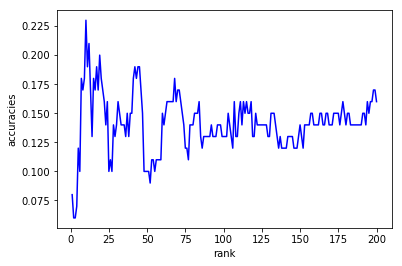

In [155]:
plt.plot(range(1, 201), accuracies, 'b-')
plt.xlabel('rank')
plt.ylabel('accuracies')
plt.show()